In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import quantstats as qs
import yfinance as yf
import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')

In [17]:
df=yf.download("SBIN.NS", start="2016-10-01", end="2020-09-30")

[*********************100%%**********************]  1 of 1 completed


In [19]:
df
SMA20 = pd.DataFrame()
SMA20['Price'] = df['Adj Close'].rolling(window = 20).mean()
SMA50 = pd.DataFrame()
SMA50['Price'] = df['Adj Close'].rolling(window = 50).mean()

# Store all Data in new DataFrame
Data = pd.DataFrame()
Data['Price'] = df['Adj Close']
Data['SMA20'] = SMA20['Price']
Data['SMA50'] = SMA50['Price']
Data['funds'] = 100000       

In [20]:
Data

,Price,SMA20,SMA50,funds
Date,,,,
2016-10-03,242.139633,NaN,NaN,100000
2016-10-04,246.360245,NaN,NaN,100000
2016-10-05,247.403549,NaN,NaN,100000
2016-10-06,243.562317,NaN,NaN,100000
2016-10-07,245.364395,NaN,NaN,100000
...,...,...,...,...
2020-09-23,175.901871,194.035179,189.255300,100000
2020-09-24,168.772018,192.154619,189.065808,100000
2020-09-25,174.370636,190.113755,188.950965,100000


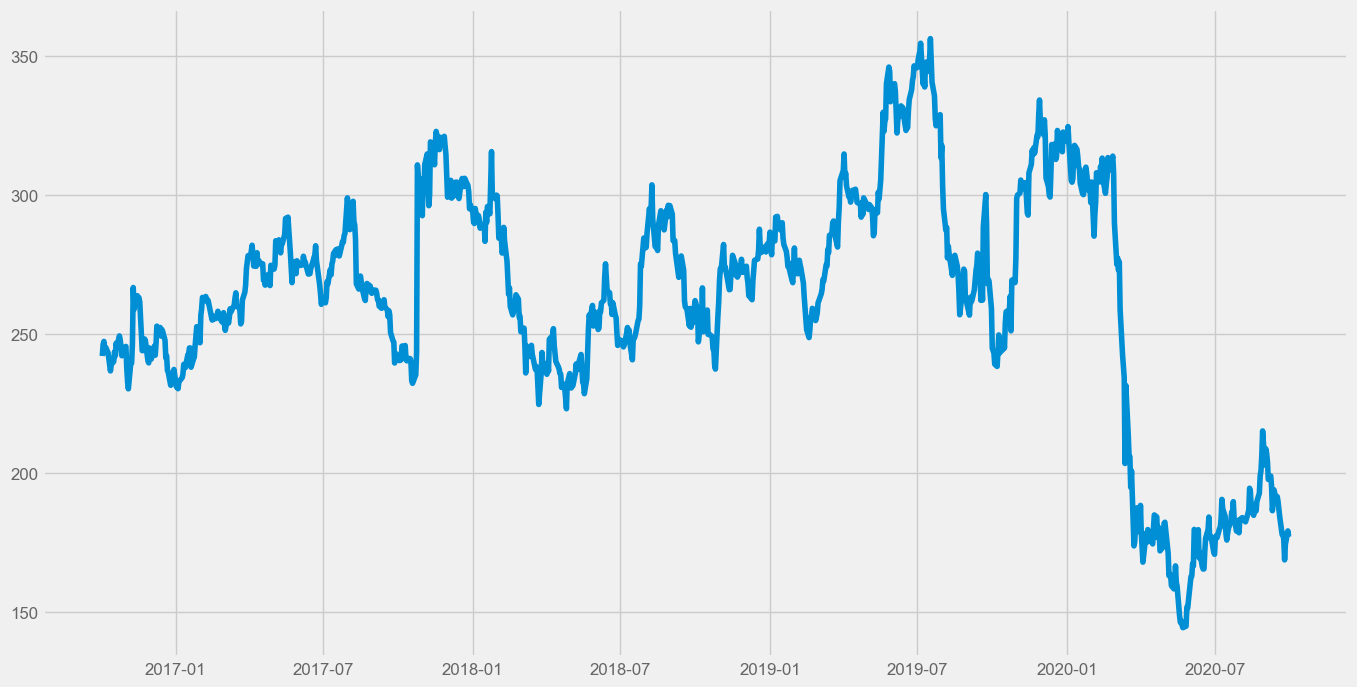

In [21]:
plt.figure(figsize=(15, 8))
plt.plot(df['Adj Close'])

In [22]:
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000] * len(data)
  last_funds = 100000
  flag = 0  
  for i in range(len(data)):
    if data['SMA20'][i] > data['SMA50'][i]:
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        last_pos = last_funds / data['Price'][i]
        funds[i] = last_funds
        open_position.append(last_pos)     
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        last_funds = data['Price'][i] * last_pos
        funds[i] = last_funds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)
    elif data['SMA20'][i] < data['SMA50'][i]:
      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        last_funds = last_pos * data['Price'][i]
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(np.NaN)
    else:
      buy_signal.append(np.NaN)
      open_position.append(0)
      sell_signal.append(np.NaN)
  return buy_signal, sell_signal, open_position, funds, flag

C:\Users\revansh\AppData\Local\Temp\ipykernel_8252\1328772532.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA20'][i] > data['SMA50'][i]:
C:\Users\revansh\AppData\Local\Temp\ipykernel_8252\1328772532.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA20'][i] < data['SMA50'][i]:
C:\Users\revansh\AppData\Local\Temp\ipykernel_8252\1328772532.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_signal

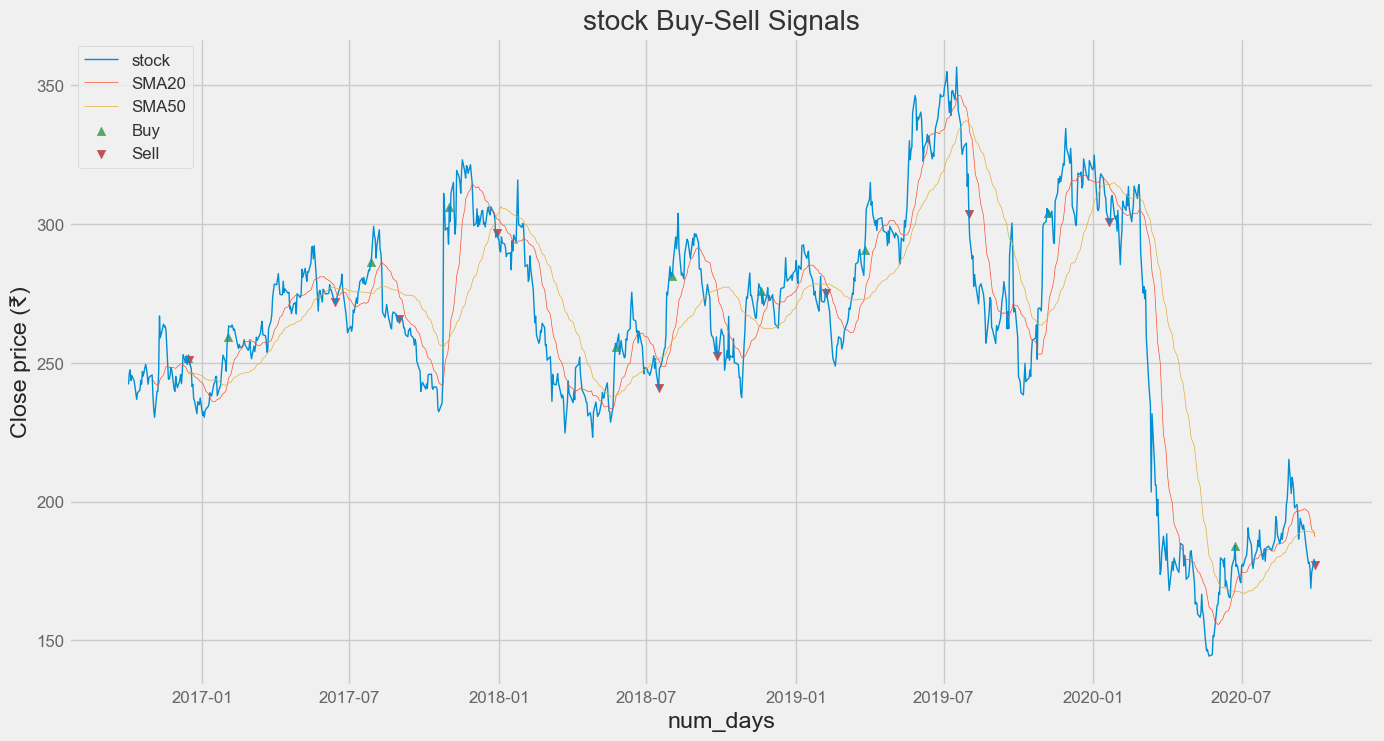

In [24]:
# Store buy and sell in Data
buy_sell = buy_sell_signal(Data)
#print(buy_sell)
Data['Buy_price'] = buy_sell[0]
Data['Sell_price'] = buy_sell[1]
Data['Open_pos'] = buy_sell[2]
Data['live_pos'] = Data['Open_pos'].multiply(Data['Price'])
Data['funds'] = buy_sell[3]

# Visualize Data and strategy to buy and sell NIFTY
plt.figure(figsize = (15, 8))
plt.plot(Data['Price'], label = 'stock', linewidth = 1)
plt.plot(Data['SMA20'], label = 'SMA20', linewidth = 0.5)
plt.plot(Data['SMA50'], label = 'SMA50', linewidth = 0.5)
plt.scatter(Data.index, Data['Buy_price'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['Sell_price'], label= 'Sell', marker = 'v', color = 'r')
plt.title('stock' + ' Buy-Sell Signals')
plt.xlabel('num_days')
plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()